Checking if model exists at: C:\Users\Admin\Desktop\DS\Bankrupsy indicator\models\rf_model.pkl
Model file found!

Attempting to load model and scaler...
Model and scaler loaded successfully!
Successfully loaded model and scaler, proceeding with evaluation...

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.43      0.61      0.50        44

    accuracy                           0.96      1364
   macro avg       0.71      0.79      0.74      1364
weighted avg       0.97      0.96      0.96      1364



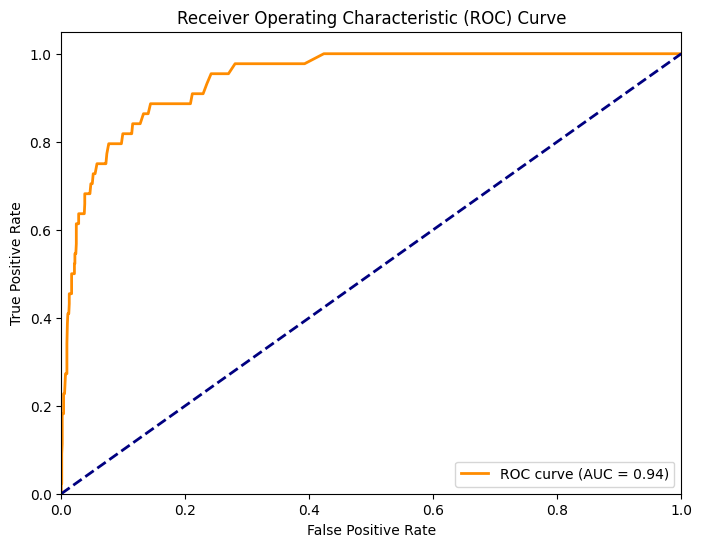

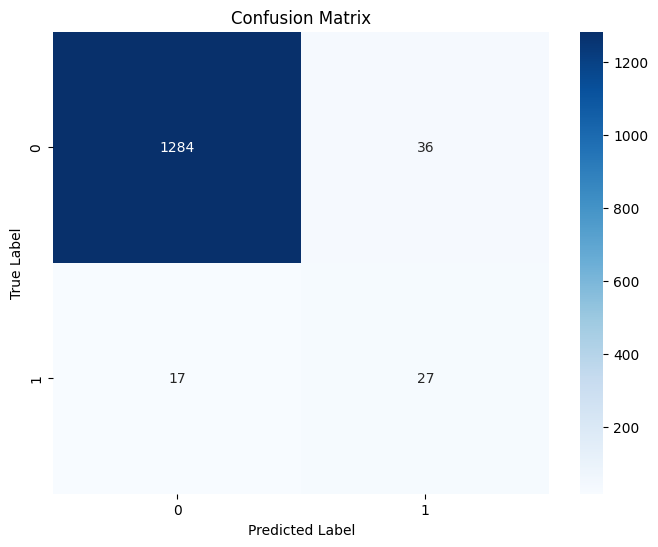

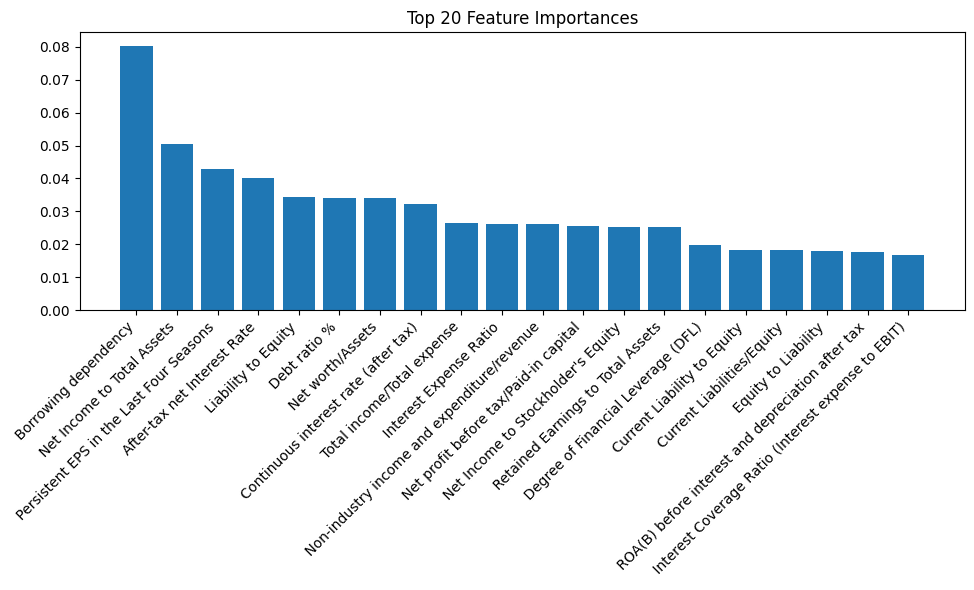

In [1]:
# Model Evaluation
import os

%run ../src/preprocess.py
%run ../src/predict.py
%run ../src/utils.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First, verify the model file exists
model_path = '../models/rf_model.pkl'
scaler_path = '../models/scaler.pkl'

print(f"Checking if model exists at: {os.path.abspath(model_path)}")
if os.path.exists(model_path):
    print(f"Model file found!")
else:
    print(f"Model file not found! Please run model_training.ipynb first")

# Load the model and test data
print("\nAttempting to load model and scaler...")
model, scaler = load_model(model_path, scaler_path)

# Verify model loaded successfully
if model is not None and scaler is not None:
    print("Successfully loaded model and scaler, proceeding with evaluation...")
    
    # Load and preprocess data
    df = pd.read_csv('../data/data.csv')
    _, X_test, _, y_test, _ = preprocess_data(df)

    # Evaluate model
    y_pred, y_pred_proba = evaluate_model(model, X_test, y_test)

    # Plot feature importance
    plot_feature_importance(model, df.drop('Bankrupt?', axis=1).columns)
else:
    print("Failed to load model or scaler. Please ensure model_training.ipynb was run successfully.")
